In [2]:
!pip install statsmodels -q

In [3]:
import pandas as pd
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
import warnings
from statsmodels.tsa.seasonal import seasonal_decompose

# Set plotting style
sns.set(style="whitegrid", palette="muted")
warnings.simplefilter(action='ignore', category=FutureWarning)

In [4]:
df = pd.read_csv('Sales.csv', encoding='latin1', parse_dates=['Order Date', 'Ship Date'])
df.head(2)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

In [6]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [7]:
df.nunique()

Row ID           9800
Order ID         4922
Order Date       1230
Ship Date        1326
Ship Mode           4
Customer ID       793
Customer Name     793
Segment             3
Country             1
City              529
State              49
Postal Code       626
Region              4
Product ID       1861
Category            3
Sub-Category       17
Product Name     1849
Sales            5757
dtype: int64

In [8]:
df.drop(columns=['Row ID', 'Order ID','Customer ID', 'Product ID','Customer Name', 'Country'], inplace=True)

In [9]:
df['Ship Date'] = pd.to_datetime(df['Ship Date'], format="%d/%m/%Y")
df['Order Date'] = pd.to_datetime(df['Order Date'], format="%d/%m/%Y")

In [10]:
df.isnull().sum()

Order Date       0
Ship Date        0
Ship Mode        0
Segment          0
City             0
State            0
Postal Code     11
Region           0
Category         0
Sub-Category     0
Product Name     0
Sales            0
dtype: int64

In [11]:
df[df["Postal Code"].isnull()]

,Order Date,Ship Date,Ship Mode,Segment,City,State,Postal Code,Region,Category,Sub-Category,Product Name,Sales
2234,2018-12-05,2018-12-10,Standard Class,Corporate,Burlington,Vermont,NaN,East,Technology,Accessories,Logitech ClearChat Comfort/USB Headset H390,205.03
5274,2016-11-07,2016-11-09,Second Class,Consumer,Burlington,Vermont,NaN,East,Furniture,Chairs,Safco Contoured Stacking Chairs,715.20
8798,2017-04-06,2017-04-10,Standard Class,Home Office,Burlington,Vermont,NaN,East,Technology,Phones,Nortel Meridian M5316 Digital phone,1294.75
9146,2017-01-23,2017-01-27,Standard Class,Corporate,Burlington,Vermont,NaN,East,Technology,Accessories,Logitech Wireless Marathon Mouse M705,99.98
9147,2017-01-23,2017-01-27,Standard Class,Corporate,Burlington,Vermont,NaN,East,Office Supplies,Art,4009 Highlighters,8.04
9148,2017-01-23,2017-01-27,Standard Class,Corporate,Burlington,Vermont,NaN,East,Office Supplies,Storage,Iceberg Mobile Mega Data/Printer Cart,1564.29
9386,2018-01-19,2018-01-23,Standard Class,Consumer,Burlington,Vermont,NaN,East,Office Supplies,Paper,Xerox 191,79.92
9387,2018-01-19,2018-01-23,Standard Class,Consumer,Burlington,Vermont,NaN,East,Office Supplies,Paper,Xerox 1881,12.28
9388,2018-01-19,2018-01-23,Standard Class,Consumer,Burlington,Vermont,NaN,East,Office Supplies,Appliances,Avanti 4.4 Cu. Ft. Refrigerator,542.94
9389,2018-01-19,2018-01-23,Standard Class,Consumer,Burlington,Vermont,NaN,East,Office Supplies,Envelopes,Poly String Tie Envelopes,2.04


In [12]:
df["Postal Code"] = df["Postal Code"].fillna(5401)

In [13]:
daily_sales = df.groupby('Order Date')['Sales'].sum().reset_index()
daily_sales = daily_sales.sort_values('Order Date')

monthly_sales = daily_sales.set_index('Order Date').resample('ME').mean()

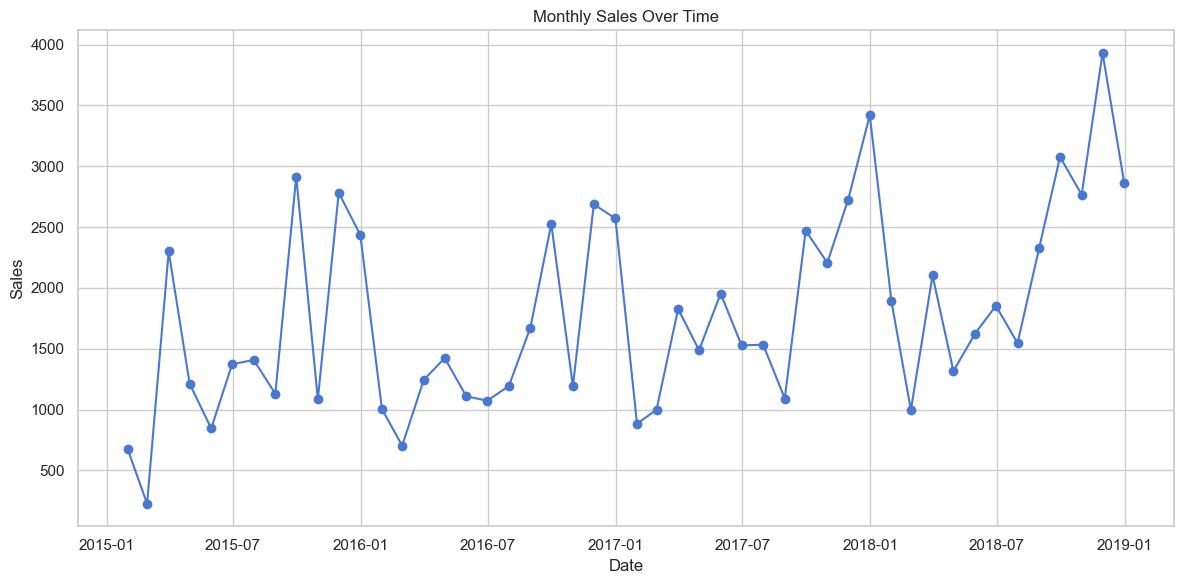

In [14]:
plt.figure(figsize=(12, 6))
plt.plot(monthly_sales.index, monthly_sales['Sales'], marker='o')
plt.title('Monthly Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.tight_layout()
plt.show()

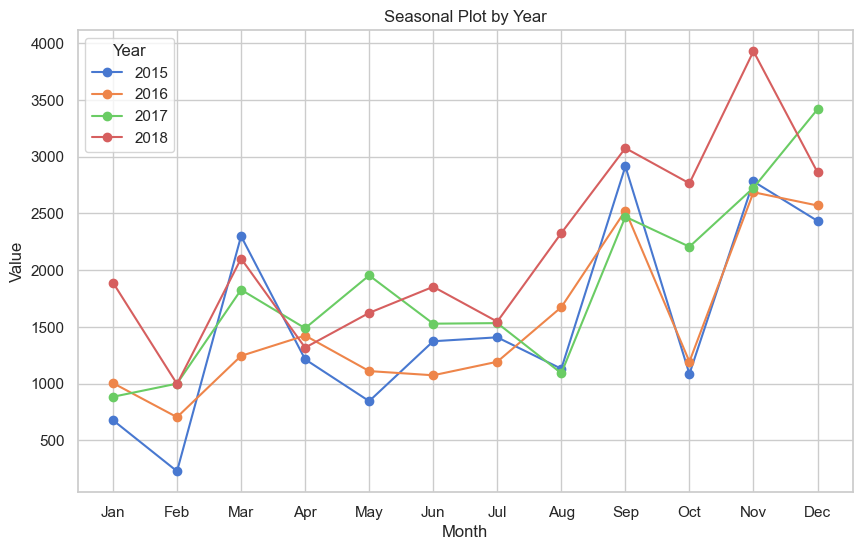

In [15]:
df2 = monthly_sales.copy()
df2['year'] = df2.index.year
df2['month'] = df2.index.strftime('%b')
df2['month_num'] = df2.index.month

df2 = df2.sort_values('month_num')

pivot = df2.pivot_table(index='month', columns='year', values='Sales', aggfunc='sum')
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
               'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
pivot = pivot.reindex(month_order)

plt.figure(figsize=(10, 6))
for year in pivot.columns:
    plt.plot(pivot.index, pivot[year], marker='o', label=year)

plt.title('Seasonal Plot by Year')
plt.xlabel('Month')
plt.ylabel('Value')
plt.legend(title='Year')
plt.grid(True)
plt.show()

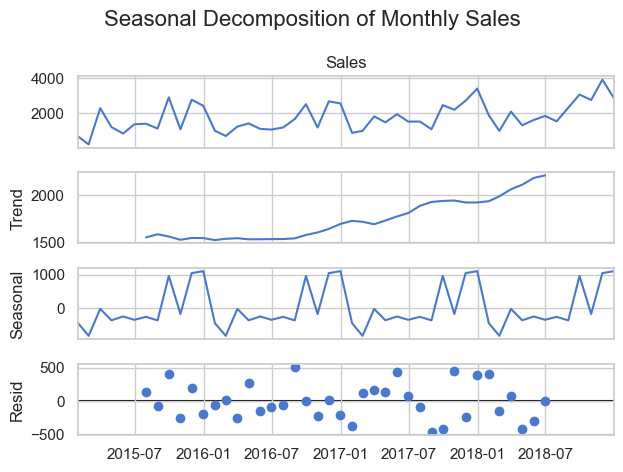

In [16]:
result = seasonal_decompose(monthly_sales['Sales'], model='additive')
result.plot()
plt.suptitle('Seasonal Decomposition of Monthly Sales', fontsize=16)
plt.tight_layout()
plt.show()

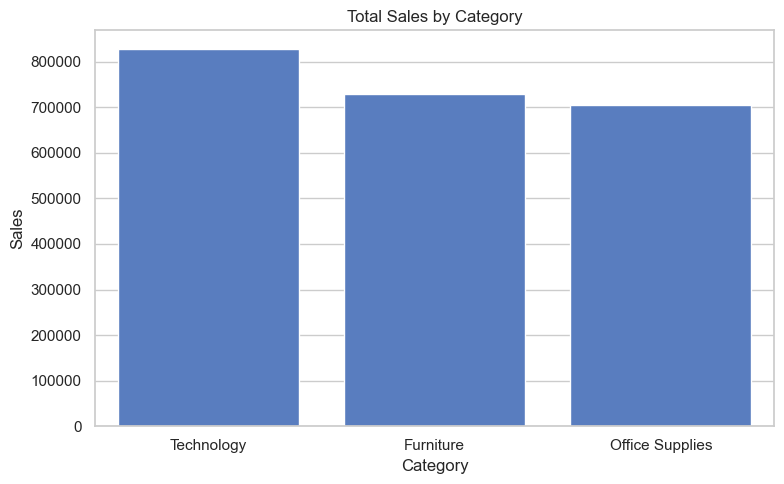

In [17]:
category_sales = df.groupby('Category')['Sales'].sum().sort_values(ascending=False)
plt.figure(figsize=(8, 5))
sns.barplot(x=category_sales.index, y=category_sales.values)
plt.title('Total Sales by Category')
plt.ylabel('Sales')
plt.xlabel('Category')
plt.tight_layout()
plt.show()

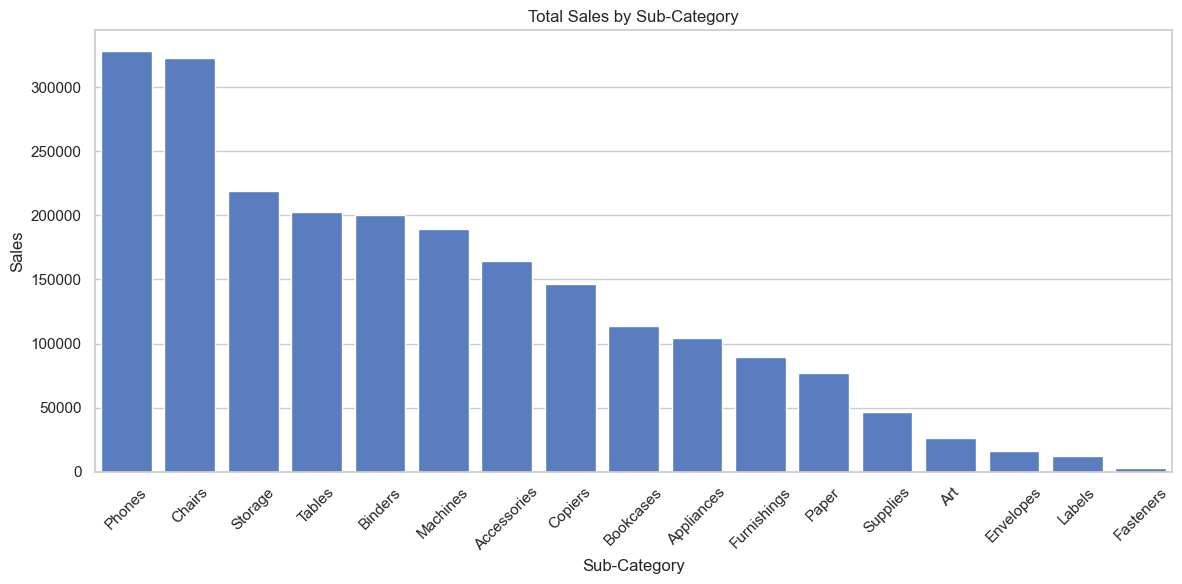

In [18]:
subcategory_sales = df.groupby('Sub-Category')['Sales'].sum().sort_values(ascending=False)
plt.figure(figsize=(12, 6))
sns.barplot(x=subcategory_sales.index, y=subcategory_sales.values)
plt.title('Total Sales by Sub-Category')
plt.ylabel('Sales')
plt.xlabel('Sub-Category')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

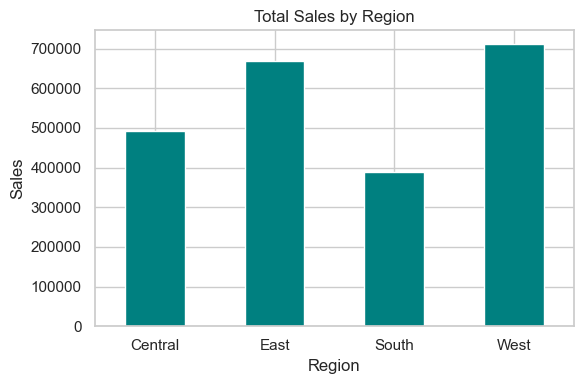

In [19]:
region_sales = df.groupby('Region')['Sales'].sum()
plt.figure(figsize=(6, 4))
region_sales.plot(kind='bar', color='teal')
plt.title('Total Sales by Region')
plt.ylabel('Sales')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

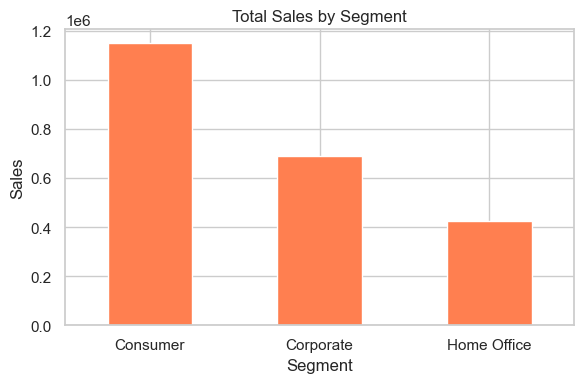

In [20]:
segment_sales = df.groupby('Segment')['Sales'].sum()
plt.figure(figsize=(6, 4))
segment_sales.plot(kind='bar', color='coral')
plt.title('Total Sales by Segment')
plt.ylabel('Sales')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

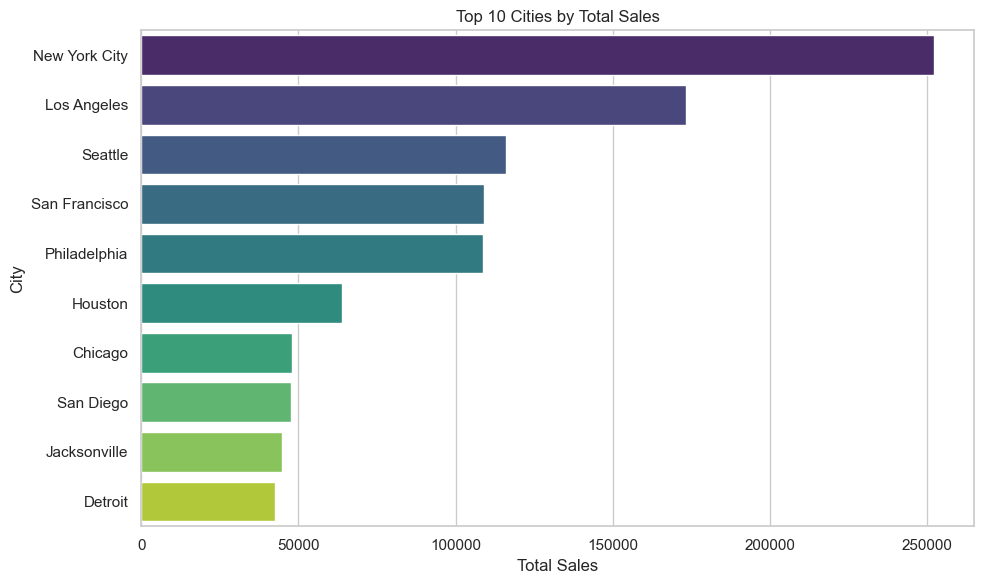

In [21]:
top_cities = df.groupby('City')['Sales'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_cities.values, y=top_cities.index, palette='viridis')
plt.title('Top 10 Cities by Total Sales')
plt.xlabel('Total Sales')
plt.ylabel('City')
plt.tight_layout()
plt.show()

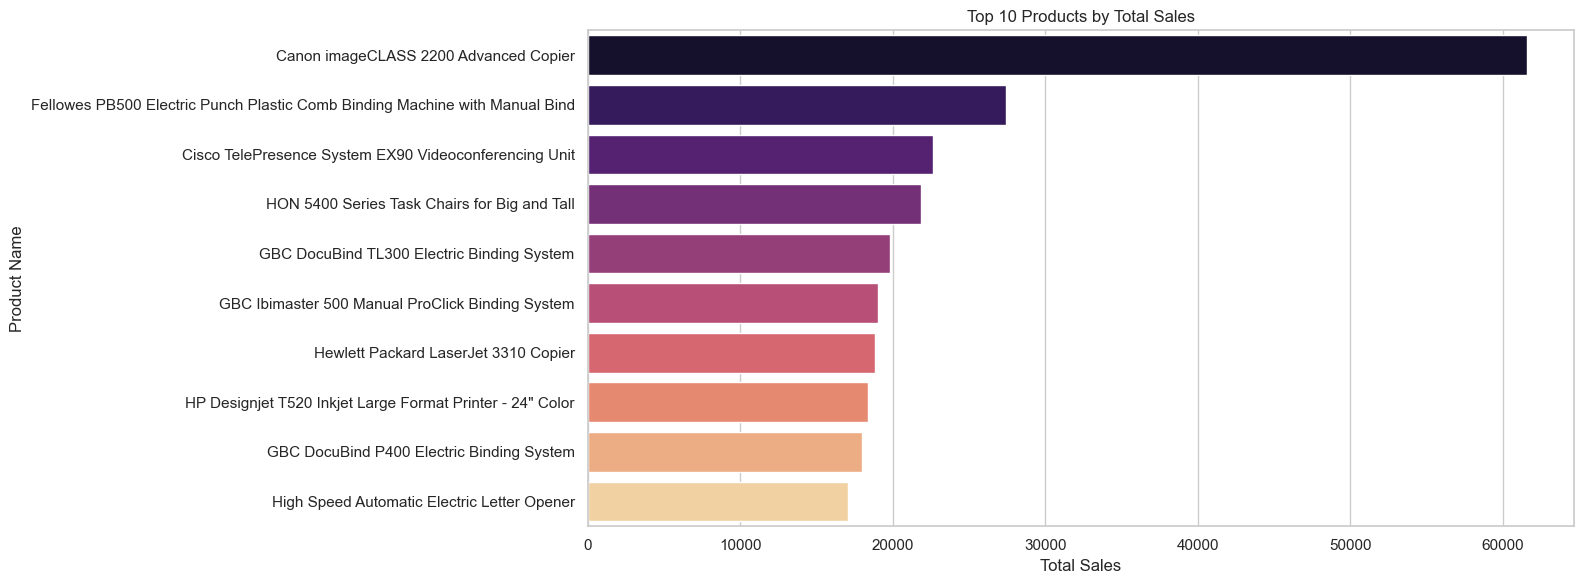

In [22]:
top_products = df.groupby('Product Name')['Sales'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(16, 6))
sns.barplot(x=top_products.values, y=top_products.index, palette='magma')
plt.title('Top 10 Products by Total Sales')
plt.xlabel('Total Sales')
plt.ylabel('Product Name')
plt.tight_layout()
plt.show()


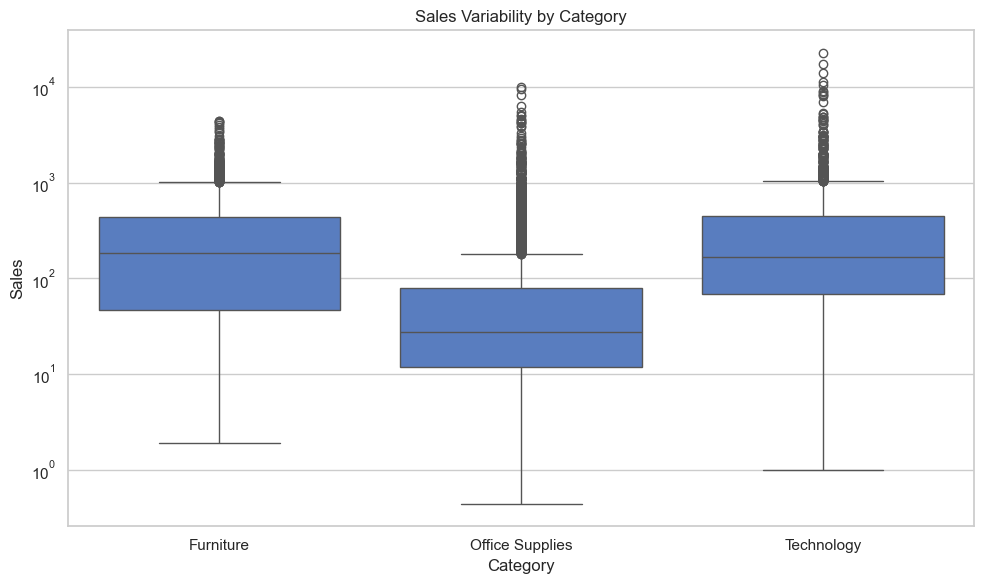

In [23]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Category', y='Sales', data=df)
plt.title('Sales Variability by Category')
plt.yscale('log')
plt.tight_layout()
plt.show()


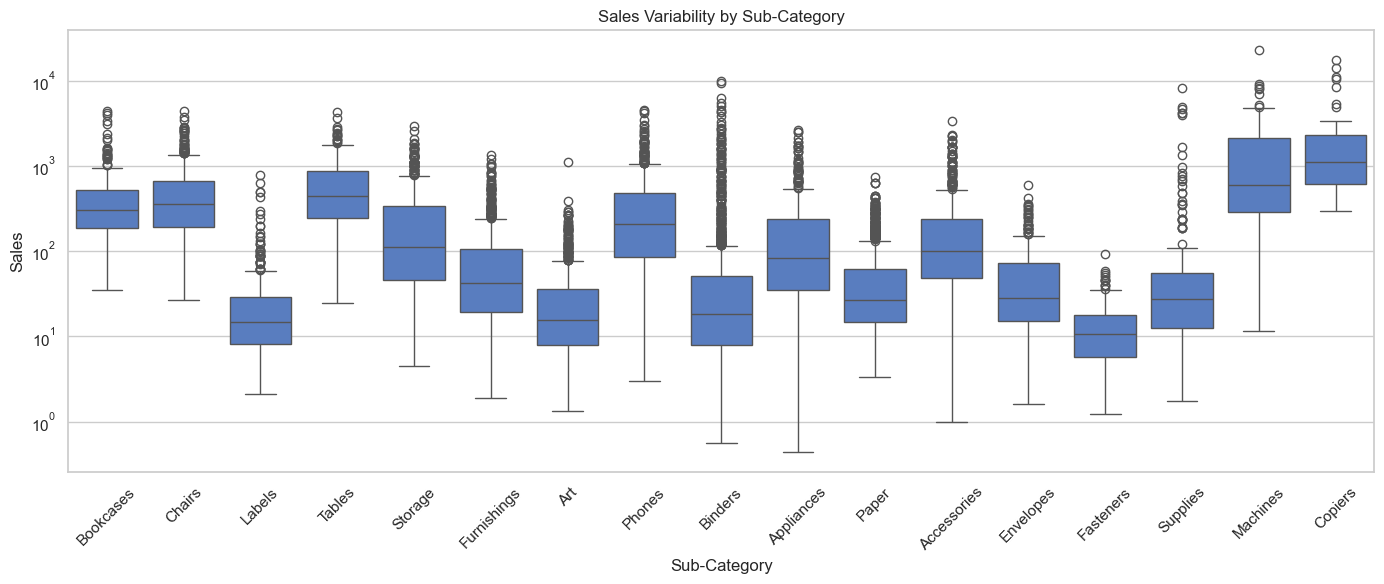

In [24]:
plt.figure(figsize=(14, 6))
sns.boxplot(x='Sub-Category', y='Sales', data=df)
plt.title('Sales Variability by Sub-Category')
plt.xticks(rotation=45)
plt.yscale('log')
plt.tight_layout()
plt.show()

In [25]:
df['Year'] = df['Order Date'].dt.year
df['Month'] = df['Order Date'].dt.month
df['Month_Name'] = df['Order Date'].dt.strftime('%b')

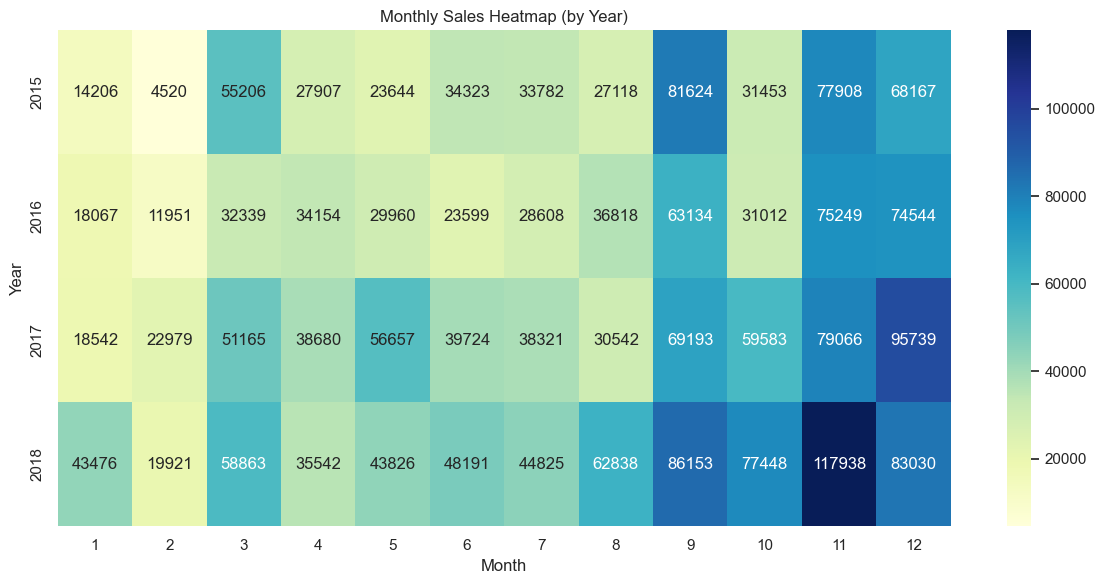

In [26]:
monthly_pivot = df.groupby(['Year', 'Month'])['Sales'].sum().unstack()
plt.figure(figsize=(12, 6))
sns.heatmap(monthly_pivot, annot=True, fmt=".0f", cmap="YlGnBu")
plt.title('Monthly Sales Heatmap (by Year)')
plt.xlabel('Month')
plt.ylabel('Year')
plt.tight_layout()
plt.show()

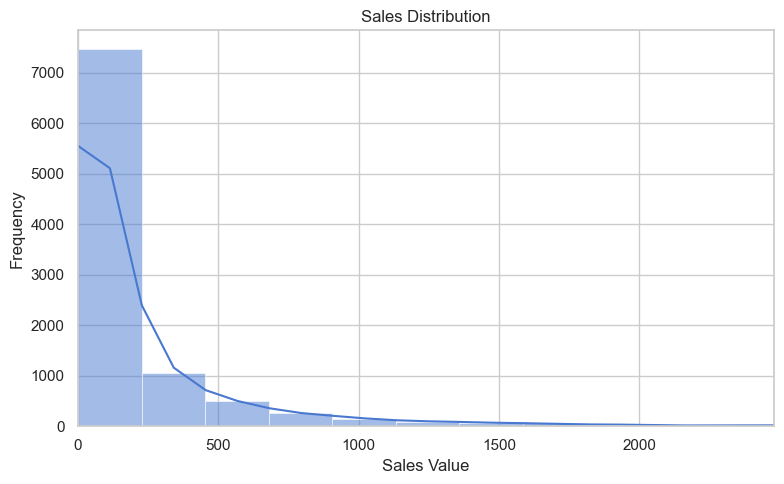

In [27]:
plt.figure(figsize=(8, 5))
sns.histplot(df['Sales'], bins=100, kde=True)

plt.xlim(0, df['Sales'].quantile(0.99))
plt.title('Sales Distribution')
plt.xlabel('Sales Value')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

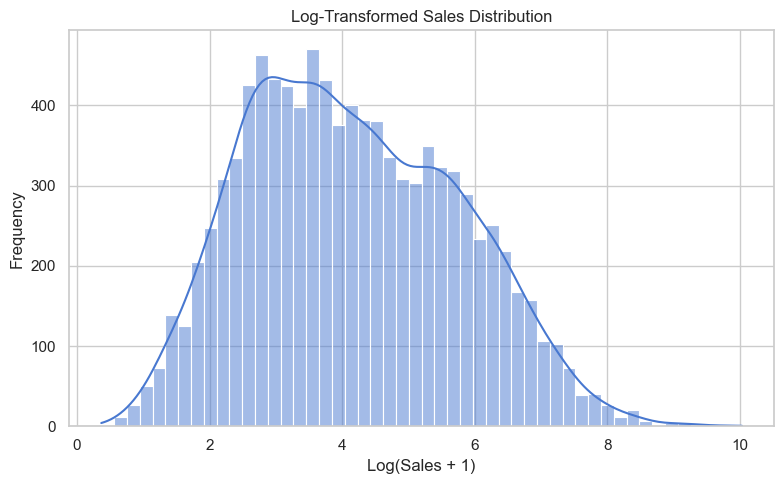

In [28]:
import numpy as np
df['Sales_log'] = np.log1p(df['Sales'])
plt.figure(figsize=(8, 5))
sns.histplot(df['Sales_log'], bins=50, kde=True)
plt.title('Log-Transformed Sales Distribution')
plt.xlabel('Log(Sales + 1)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

In [42]:
df.to_csv('Cleaned_Sales.csv', index=False)